In [25]:
from pathlib import Path

import torch
from PIL import Image
from torchlake.common.utils.convert import tensor_to_np
from torchlake.common.utils.image import save_img_array
from torchlake.common.utils.plot import plot_grids
from torchlake.style_transfer.models import (FeatureExtractor,
                                             NeuralStyleTransfer,
                                             NeuralStyleTransferLoss)
from torchlake.style_transfer.utils.train import run_style_transfer
from torchvision.transforms import v2

# setting

In [26]:
content_path = Path("../../data/contents")
style_path = Path("../../data/styles")
artifacts_path = Path("../../artifacts/neural-style-transfer")

In [27]:
device = torch.device('cuda:0')

In [28]:
CONTENT_LAYER_NAMES = ['3_1']
STYLE_LAYER_NAMES = ['1_1', '2_1', '3_1', '4_1', '5_1']

# data

In [29]:
transform = v2.Compose([
  v2.Resize((512, 512)),
  v2.ToImage(),
  v2.ToDtype(torch.float32, scale=True),
])

In [30]:
content = Image.open(content_path.joinpath('101.jpg'))
content = transform(content).unsqueeze(0).to(device)

style = Image.open(style_path.joinpath('starry.jpg'))
style = transform(style).unsqueeze(0).to(device)

# model

In [31]:
feature_extractor = FeatureExtractor('vgg19', 'relu', device)

In [32]:
model = NeuralStyleTransfer(feature_extractor, CONTENT_LAYER_NAMES, STYLE_LAYER_NAMES)

# train

In [33]:
CONTENT_WEIGHT = 1
STYLE_WEIGHT = 1e6

In [34]:
criterion = NeuralStyleTransferLoss(2, CONTENT_WEIGHT, STYLE_WEIGHT)

In [35]:
output = run_style_transfer(model, criterion, content, style)

run 50:
Total Loss: 13.710224 Content Loss: 7.345519 Style Loss : 0.000006

run 100:
Total Loss: 10.329595 Content Loss: 6.826323 Style Loss : 0.000004

run 150:
Total Loss: 8.963379 Content Loss: 6.843328 Style Loss : 0.000002

run 200:
Total Loss: 8.905663 Content Loss: 7.267027 Style Loss : 0.000002

run 250:
Total Loss: 8.263710 Content Loss: 6.740963 Style Loss : 0.000002

run 300:
Total Loss: 7.655688 Content Loss: 6.402502 Style Loss : 0.000001



In [36]:
# 224 -> 24s
# 512 -> 1m37s~4.5m
# 768 -> 14m

# visualize

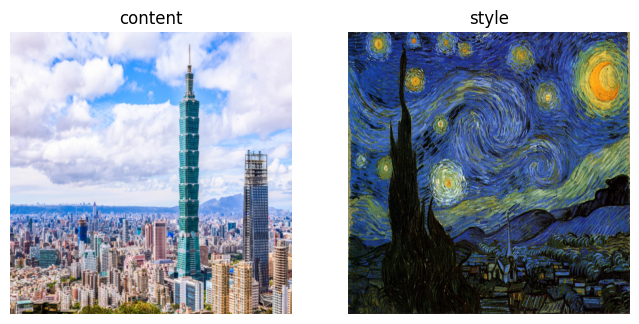

In [37]:
plot_grids(
    [tensor_to_np(content), tensor_to_np(style)],
    ["content", "style"],
    1,
    2,
)

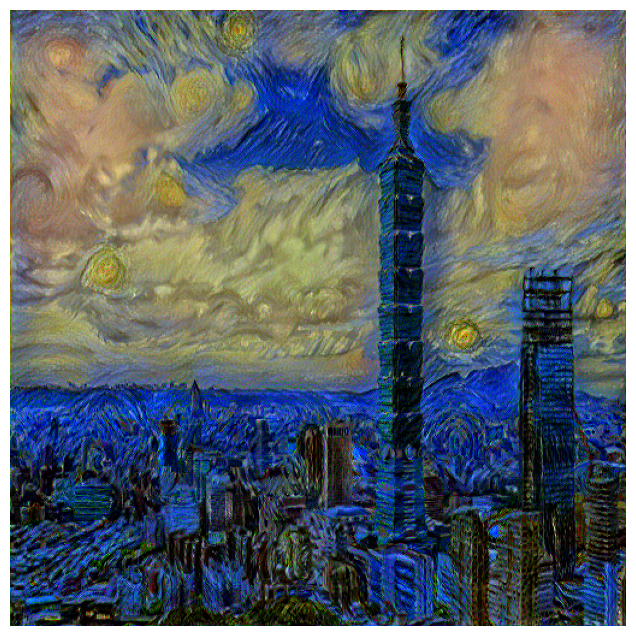

In [38]:
plot_grids([tensor_to_np(output)])

In [39]:
output_path = artifacts_path.joinpath('output.png')

In [40]:
save_img_array(tensor_to_np(output), output_path)